### **Exercise1:**

Create your own class for complex numbers, just like you would in c++. Make sure all the arithmetic operations work (yes, this is another useless exercise to play with the syntax).

In [11]:
class Complex:
    def __init__(self,r,i):
        self.r=r
        self.i=i    
    def __add__(self,other):   
        r=self.r+other.r
        i=self.i+other.i
        return Complex(r,i)
    def __sub__(self,other):   
        r=self.r-other.r
        i=self.i-other.i
        return Complex(r,i)
    def __mul__(self,other):   
        r=self.r*other.r - self.i*other.i
        i=self.r*other.i + self.i*other.r
        return Complex(r,i)
    
    def __str__(self):
        return "{0} i{1}".format(self.r, self.i) #"converts" class to a string

In [13]:
var1=Complex(1,3)
var2=Complex(2,2)
print(var1+var2)
print(var1-var2)
print(var1*var2)

3 i5
-1 i1
-4 i8


### **Exercise2:**

Rewrite your jacobi solution from the previous exerxise set with classes (you can follow the same layout as the c++ solution).

<class 'numpy.ndarray'>


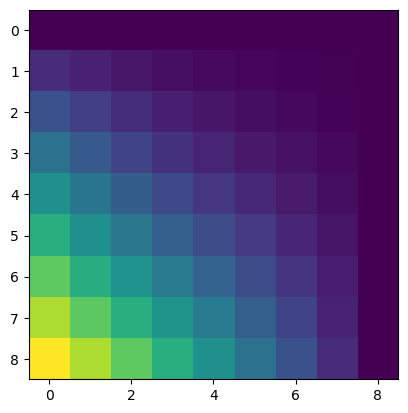

In [23]:
import numpy as np
import matplotlib.pyplot as plt
size = 9
times = 10
arr_center = np.full((size-2,size-2), 0.5)
arr_upper = np.zeros((1,size-2), dtype='int')
arr_right = np.zeros((size-1,1), dtype='int')
arr_lower = np.linspace(100,0,size).reshape(1, size)
arr_left= np.linspace(0,100,size)
arr = np.concatenate([arr_upper,arr_center])
arr = np.concatenate([arr,arr_right],axis=1)
arr = np.concatenate([arr_left[:-1].reshape(size-1, 1),arr],axis=1)
arr = np.concatenate([arr,arr_lower])
#plt.imshow(arr)
arr_new = arr.copy()

for t in range (times):
    for i in range (size):
        for j in range (size):
            if i > 0 and j > 0 and i < size-1 and j < size-1:
                arr_new[i][j] = 0.25*(arr[i-1][j] + arr[i][j-1] + arr[i+1][j]+ arr[i][j+1])
    arr = arr_new
    plt.imshow(arr)
print (type(arr))    



In [30]:
import numpy as np
import matplotlib.pyplot as plt
class Mesh:
    def __init__(self, size):
        self.size = size
        arr_center = np.full((size-2,size-2), 0.5)
        arr_upper = np.zeros((1,size-2), dtype='int')
        arr_right = np.zeros((size-1,1), dtype='int')
        arr_lower = np.linspace(100,0,size).reshape(1, size)
        arr_left= np.linspace(0,100,size)
        arr = np.concatenate([arr_upper,arr_center])
        arr = np.concatenate([arr,arr_right],axis=1)
        arr = np.concatenate([arr_left[:-1].reshape(size-1, 1),arr],axis=1)
        arr = np.concatenate([arr,arr_lower])
        self.arr = arr
    def __str__(self):
        return "{0} ".format(self.arr) #"converts" class to a string
    def __getitem__(self, index):
        """Supports two-dimensional indexing 
        with [row][column]."""
        return self.arr[index]
class Solve:
    def __init__(self, Mesh, times):
        self.arr = Mesh
        self.arr_new = Mesh
        self.printable = np.zeros((Mesh.size, Mesh.size), dtype='float')
        self.times = times
        self.size = Mesh.size
        #self.size = Mesh.size
        #arr_new = arr.copy()
    def solve(self):
        for t in range (self.times):
            for i in range (self.size):
                for j in range (self.size):
                    if i > 0 and j > 0 and i < self.size-1 and j < self.size-1:
                        self.arr_new[i][j] = 0.25*(self.arr[i-1][j] + self.arr[i][j-1] + self.arr[i+1][j]+ self.arr[i][j+1])
                    self.printable[i][j] = self.arr[i][j]
            self.arr = self.arr_new            
            plt.imshow(self.printable)

[[  0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 12.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 25.    0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 37.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 50.    0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 62.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 75.    0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 87.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [100.   87.5  75.   62.5  50.   37.5  25.   12.5   0. ]] 
[[  0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 12.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 25.    0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 37.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 50.    0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 62.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 75.    0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [ 87.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0. ]
 [100.   87.5  75.   62.5  50

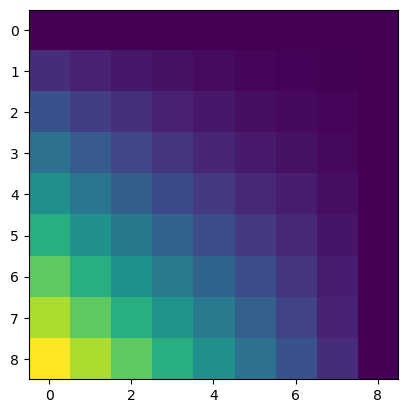

In [32]:
j = Mesh(9)
print(j)
#print(j.size)
abc = Solve(j, 10)
print(abc.arr_new)

fff = abc.solve()
#print(type(fff))

### **Exercise3:**

Write a `cython` module with a function that solves the quadratic equation (you don't need to use classes here for now)

In [36]:
%load_ext Cython

In [38]:
import cmath
def quadratic(a,b,c):
    delta = cmath.sqrt(b**2-4*a*c)
    #print(delta)
    x1 = (-b + delta)/(2*a)
    x2 = (-b - delta)/(2*a)
    return x1, x2

In [45]:
%%cython
import math
def quadratic2(a,b,c):
    cdef double delta = math.sqrt(b**2-4*a*c)
    #print(delta)
    cdef double x1 = (-b + delta)/(2*a)
    cdef double x2 = (-b - delta)/(2*a)
    return x1, x2

In [52]:
import cmath
print(cmath.sqrt(2))
print(cmath.sqrt(-2))

(1.4142135623730951+0j)
1.4142135623730951j


In [48]:
%%timeit 
quadratic(2,4,1)

1.08 µs ± 87 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [53]:
%%timeit 
quadratic2(2,4,1)

643 ns ± 42.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### **Exercise4:**

Use `pibind` to call the c++ code for jacobi (from the the extra_exercises solutions) 